In [1]:
import drawsvg as dw
%load_ext jhmagics

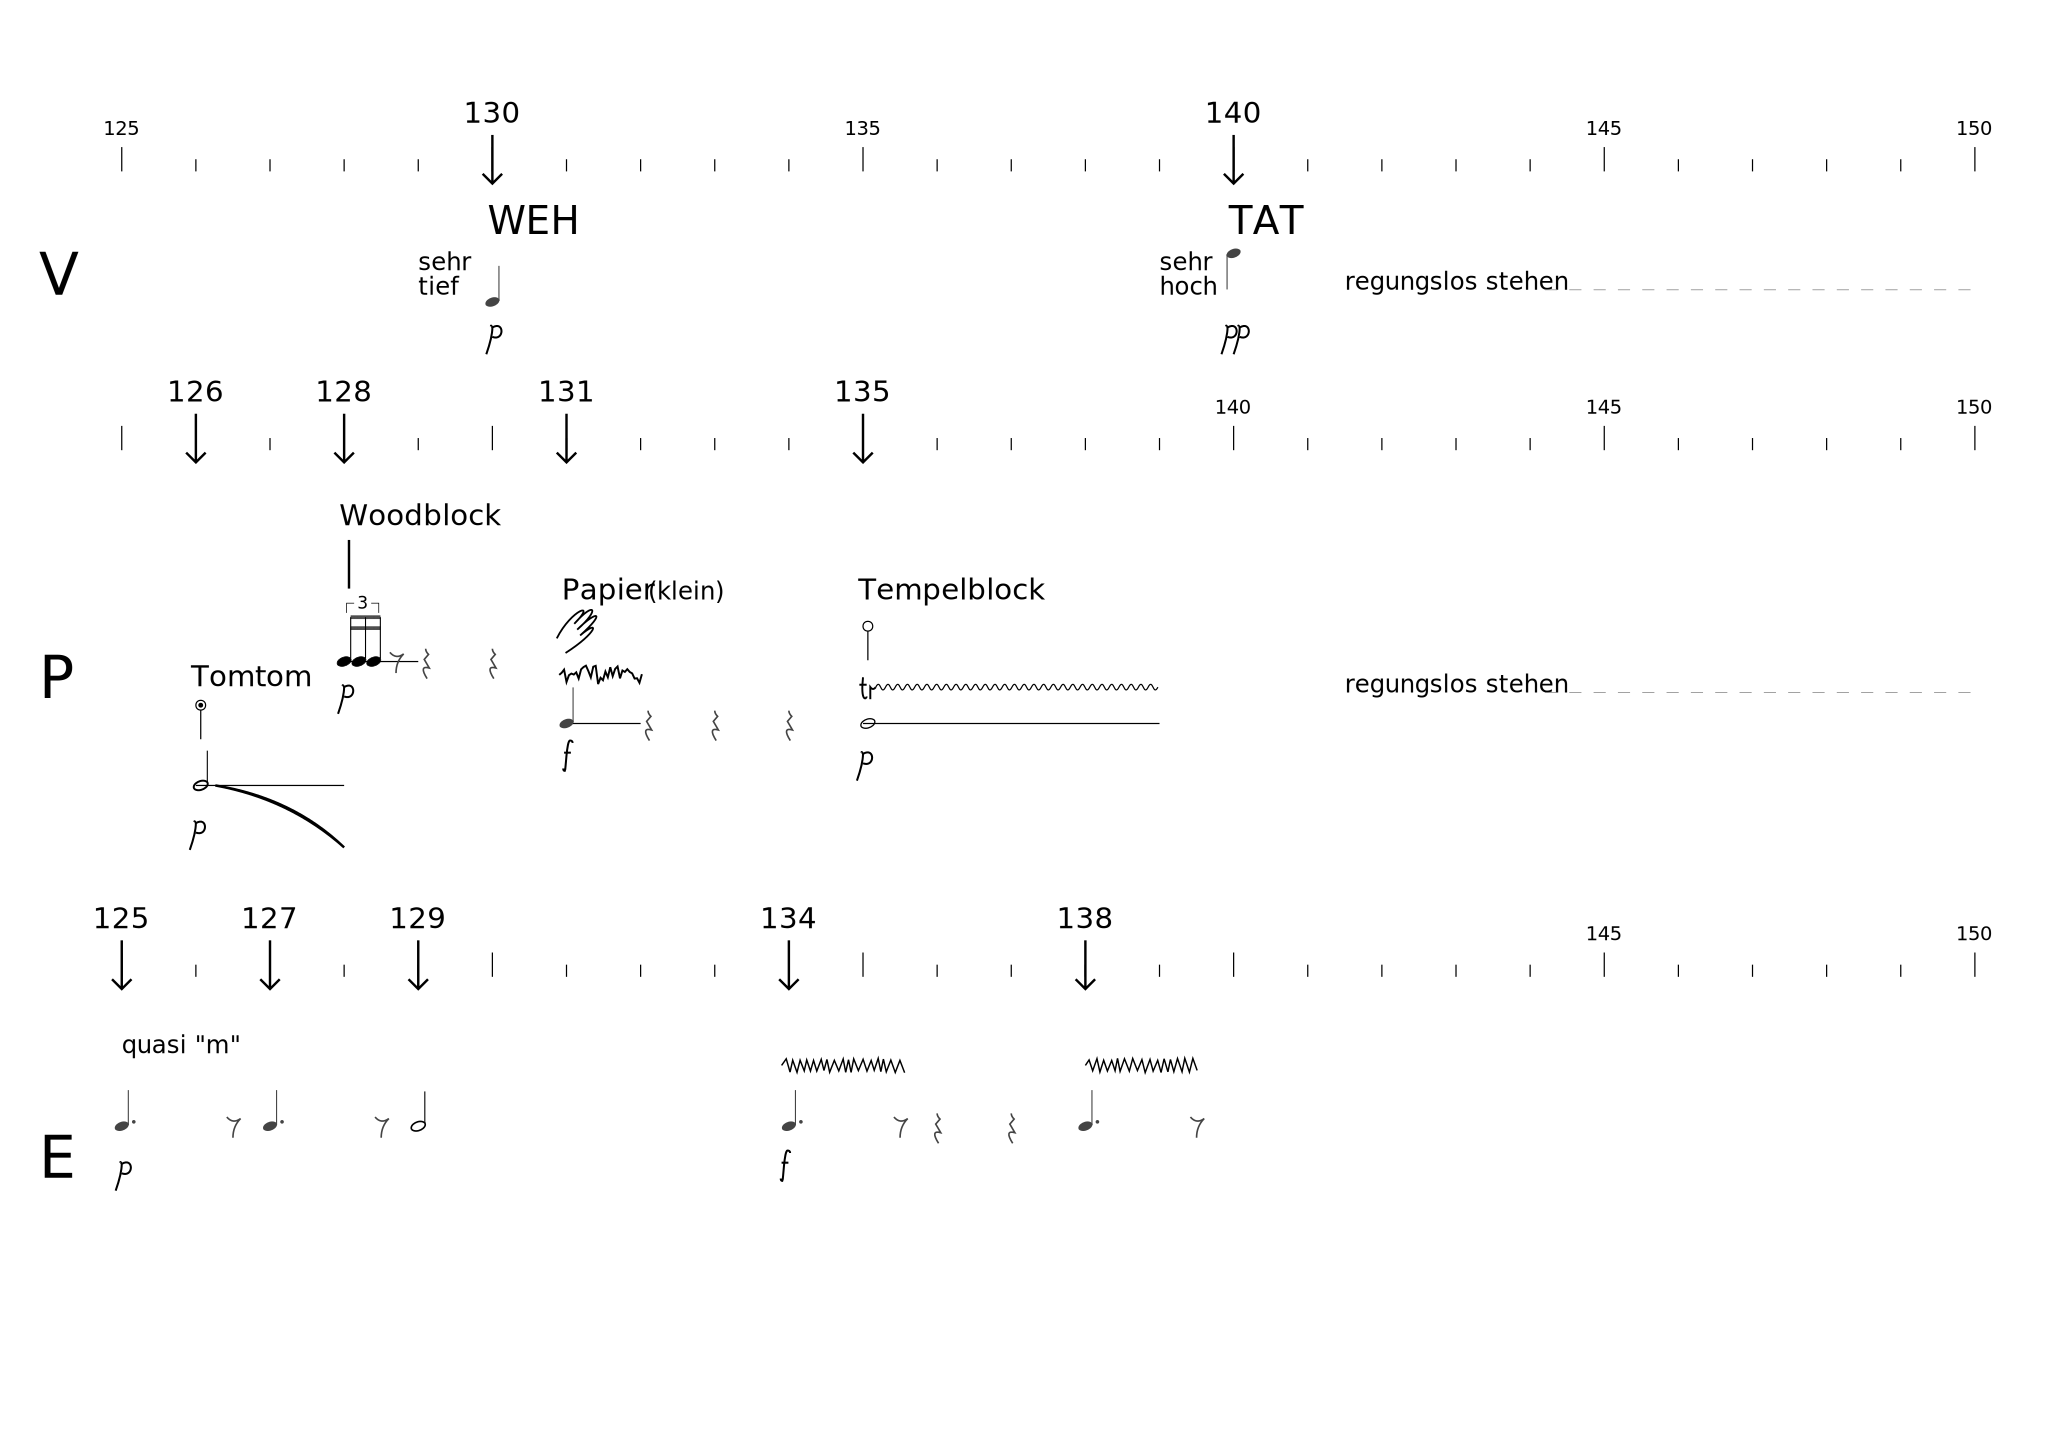

In [95]:
%%jh

w,h = 842,595
d = dw.Drawing(w,h,font_family='Simvoni')

# page settings
xnum,ynum = 26,22 # posts (= one more than divisions)
mleft,mright,mtop,mbot = 50,30,30,30
xsize,ysize = w-mleft-mright,h-mtop-mbot
xunit,yunit = xsize / (xnum-1),ysize / (ynum-1)

# load own functions
from os import listdir
dir = '/home/jh/src/svg/lib'
files = listdir(dir)
for file in files:
    if file[-3:] == '.py':
        f = '%s/%s' % (dir,file)
        exec(open(f).read())

# custom functions for xgrid and ygrid for this page
def xg(indx):
    return xgrid(indx,tm0)
def yg(indx):
    return ygrid(indx)
    
# raster am rand zur orientierung
#showGridOnMargins()
#showWritingSpace()

# zeitleisten und instrumente links
tm0 = 125  # zeit am anfang dieser seite
off = 15 # offset für die striche
 # normale zahlen in V P E
norm = [[125,135,145,150],[140,145,150],[145,150]]
 # events in V P E
event = [[130,140],[126,128,131,135],[125,127,129,134,138]]
 # ygrid positionen für die leisten
yleisten = [1,5.5,14]
 # instrumente 
insnamen = ['V','P','E']
ytimeplus = [*yleisten,ynum-1]
yposinsnamen = [ytimeplus[i]+(ytimeplus[i+1]-ytimeplus[i])/2 for i in range(3)]
 # write out
for l in range(3):
    y = ygrid(yleisten[l])
    text(insnamen[l],xgrid(0)-34,ygrid(yposinsnamen[l]),24,dominant_baseline='middle')
    for i in range(xnum):
        x = xgrid(i)
        if i%5==0: vline(x,y+off,-10,sw=.5)
        else: vline(x,y+off,-5,sw=.5)
        if (i+tm0) in norm[l]:
            text('%d'%(i+tm0),x,y,8,text_anchor='middle')
        elif (i+tm0) in event[l]:
            text('%d'%(i+tm0),x,y-5,12,text_anchor='middle')
            arrow(x,y,20,4)

# noten und pausen und dynamik größe
notsiz = 4.5
nothals = 1.2
pausiz = 4.5
dynsiz = 10

            
################# VOICE #################

 # weh
x = xg(130)
ygindxvtop = yleisten[0]+.8
ygindxtext = ygindxvtop+.8 #text baseline
text('WEH',x-2,yg(ygindxtext),16)
y = yg(ygindxvtop+1.7)
not4tel(x,y+5,nothals,notsiz)
text(['sehr','tief'],xg(129),y-8,10,font_family='Cantarell Light',font_style='italic')
yy = y+20
piano(x,yy,dynsiz)

 # tat
x = xg(140)
ygindxvtop = yleisten[0]+.8
ygindxtext = ygindxvtop+.8 #text baseline
text('TAT',x-2,yg(ygindxtext),16)
y = yg(ygindxvtop+1.7)
not4tel(x,y-15,-nothals,notsiz)
text(['sehr','hoch'],xg(139),y-8,10,font_family='Cantarell Light',font_style='italic')
yy = y+20
pianissimo(x,yy,dynsiz)


################# PERCUSSION #################

 # linien und instrumente
ypercindx = yleisten[1]
yltom = ypercindx+6
ylwb = ypercindx+4
ylpap = ypercindx+5
yltemp = ypercindx+5
startends = [126,128,128,129,131,132,135,139]
insnamen = ['Tomtom','Woodblock','Papier','Tempelblock']
yoffsetins = [1.6,2.2,2,2] #abstand der namen von den linien
for i,yl in enumerate([yltom,ylwb,ylpap,yltemp]):
    y = yg(yl)
    x1 = xg(startends[i*2])
    x2 = xg(startends[i*2+1])
    line(x1,y,x2,y,stroke_width=0.5)
    text(insnamen[i],x1-2,yg(yl-yoffsetins[i]),12,font_family='Cantarell')
    
 # tomtom
y = yg(yltom)
x = xg(126)
percSuperball(x+2,y-33)
not2tel(x+2,y,nothals,notsiz,swfac_head=1.2)
glisscurve(x+8,y,xg(128),y+yunit)
piano(x,y+20,dynsiz)

 # woodb
y = yg(ylwb)
x = xg(128)
percStricknadel(x+2,y-50)
gruppe([x,y,xg(128.2),y,xg(128.4),y],2,y_space=notsiz)
yy = y-24
nlet(x,yy,x+xunit*.5,yy,text='3')
paus8tel(xg(128.7),y,pausiz)
piano(x,y+15,dynsiz)
paus4tel(xg(129.1),y,pausiz)
paus4tel(xg(130),y,pausiz)

 # papier
y = yg(ylpap)
x = xg(131)
text(['(klein)'],xg(132.1),y-2*yunit,10,font_family='Cantarell Light',font_style='italic')
hand(x+2,y-35)
kratzgliss(x-3,y-20,x+xunit,y-20)
not4tel(x,y,nothals,notsiz)
forte(x-1,y+17,dynsiz)
paus4tel(xg(132.1),y,pausiz)
paus4tel(xg(133),y,pausiz)
paus4tel(xg(134),y,pausiz)

 # tempelblock
y = yg(yltemp)
x = xg(135)
percSoftMallet(x+2,y-40)
triller(x,y-10,x+xunit*4,9)
note(x+2,y,notsiz,1.2,fill='none')
piano(x,y+17,dynsiz)

 # text ab 141

y1 = yg(3.5)
y2 = yg(10)
text('regungslos stehen',xg(141.5),y1,10,font_family='Cantarell Light',font_style='italic')
text('regungslos stehen',xg(141.5),y2,10,font_family='Cantarell Light',font_style='italic')
x = xg(144.2)
hline(x,y1,xg(150)-x,c='gray',stroke_dasharray='5 5',sw=.3)
hline(x,y2,xg(150)-x,c='gray',stroke_dasharray='5 5',sw=.3)



################# ELEKTRONIK #################

 # 125 - 129
y = yg(17)
x = xg(125)
text('quasi "m"',x,y-30,10,font_family='Cantarell Light',font_style='italic')
piano(x,y+20,dynsiz)
not4tel(x,y,nothals,notsiz,dotted=1)
paus8tel(xg(126.5),y,pausiz)
not4tel(xg(127),y,nothals,notsiz,dotted=1)
paus8tel(xg(128.5),y,pausiz)
not2tel(xg(129),y,nothals,notsiz)

 # 134, 138
x = xg(134)
krackelinie(x-3,y-25,x+xunit*1.5,y-25,2,3,1,2)
forte(x-3,y+20,dynsiz)
not4tel(x,y,nothals,notsiz,dotted=1)
paus8tel(xg(135.5),y,pausiz)
paus4tel(xg(136),y,pausiz)
paus4tel(xg(137),y,pausiz)
krackelinie(xg(138),y-25,xg(139.5),y-25,2,3,1,2)
not4tel(xg(138),y,nothals,notsiz,dotted=1)
paus8tel(xg(139.5),y,pausiz)



d.set_pixel_scale(4)
d.save_png('partitur_06.png')
d.save_svg('partitur_06.svg')
d

In [89]:
help(krackelinie)

Help on function krackelinie in module __main__:

krackelinie(x1=10, y1=10, x2=50, y2=10, hmin=3, hmax=4, prdmin=1.5, prdmax=3, swfac=1, c='black', **args)
    eine krackel linie aus alternierenden oben-unten zacken.
    hmin und hmax ist die minimale und maximale höhe (auch nach unten)
    prdmin und prdmax ist die minimale und maximale periode
    ist im moment nur für waagerechte (y1=y2) definiert; später nochmal die y-linie reinbringen
    h * swfac * 0.2 = stroke_width

